### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

Summary

General Notes
In this analysis, an effort is being made, to process values of different variable in three separate Data Sets.
The observations in the several different attributes, were made, as it is cleared stated in the intoduction, 
from a research team in the University of Minnesota. As several sources in the web mentions (e.g. Wikipedia, etc)
the data were coolected through a web page in order to gather research data on personalized recommendations.
It is cleared specified (Wikipedia) thet MovieLens is a web-based recommender system and virtual community 
that recommends movies for its users to watch, based on their film preferences using collaborative 
filtering of members' movie ratings and movie reviews.

In general in our sample consists in 100.000 ratings from 1 to 5. We use a total amount of 1682 movies. The persons in our sample are 943 both males and females. Description of our users is available like age, occupation and where they stay(zip code).


Below we will import all the Necessary packages in order to achieve the best outcome or solve the questions with different approach

In [32]:
import numpy as np # for arrays processing
import pandas as pd # for dataframes processing
import matplotlib as plt # for plots designing
import seaborn as sns 
import warnings
sns.set (style = "darkgrid")

Read the 3 datasets into dataframes, basically with the help pd.read_csv that leads to the creation of three different dataframes

In [33]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv",index_col ="movie id")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data

In [16]:
print('data.csv Data Info')
print(data.info())
print()
print('data.csv Data Shape')
print(data.shape)
print()
print('data.csv Data Describe')
print(data.describe)
print()
print('Total Number of Missing Values: ', data.isnull().sum().sum())  
# Total number of recognised missing values in the entire dataframe

data.csv Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

data.csv Data Shape
(100000, 4)

data.csv Data Describe
<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12      

In [17]:
print('item.csv Data Info')
print(item.info())
print()
print('item.csv Data Shape')
print(item.shape)
print()
print('item.csv Data Describe')
print(item.describe)
print()
print('Total Number of Missing Values: ', item.isnull().sum().sum())  # Total number of recognised missing values in the entire dataframe

item.csv Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null  

In [18]:
print('user.csv Data Info')
print(user.info())
print()
print('user.csv Data Shape')
print(user.shape)
print()
print('user.csv Data Describe')
print(user.describe)
print()
print('Total Number of Missing Values: ', user.isnull().sum().sum())  # Total number of recognised missing values in the entire dataframe

user.csv Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

user.csv Data Shape
(943, 5)

user.csv Data Describe
<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941

#### 4. Find the number of movies per genre using the item data 

In [19]:
# Check
item['movie id'] = item.drop
sum_column = item.sum(axis=0, numeric_only=True)
header = "'Genre'       'Sum'"
print(header)
print(sum_column)

'Genre'       'Sum'
unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


The movies that have more than one genre :

In [20]:
#hint: use sum on the axis = 1
#item['movie id'] = item.drop
#item.drop('movie id',axis=1)
#item.set_index('movie title')
sum_column = item.sum(axis=1)
print(sum_column[sum_column>1])


0       3
1       3
3       3
4       3
6       2
       ..
1667    3
1668    2
1671    2
1677    2
1678    2
Length: 849, dtype: int64


 Locating and then dropping the movie where the genre is unknown

In [22]:
item.loc[item['unknown'] == 1]

RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded while calling a Python object

In [23]:
item.drop([1373])

RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded while calling a Python object

Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' 

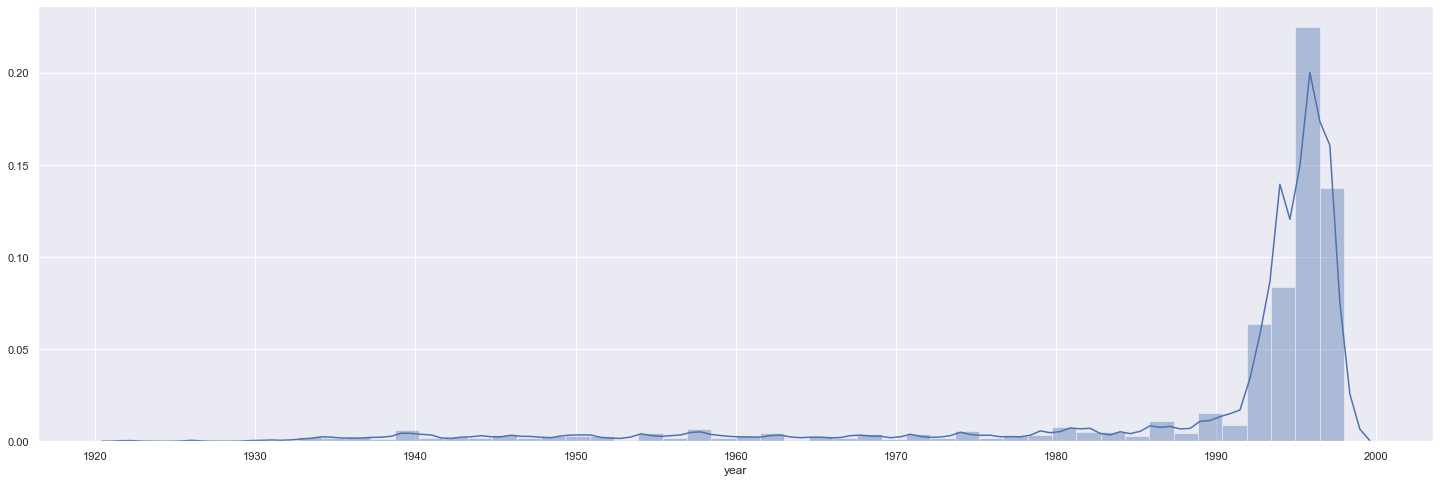

In [24]:
item['year'] = pd.DatetimeIndex(item['release date']).year
plt.figure(figsize=(25,8))
sns.distplot(item.year)

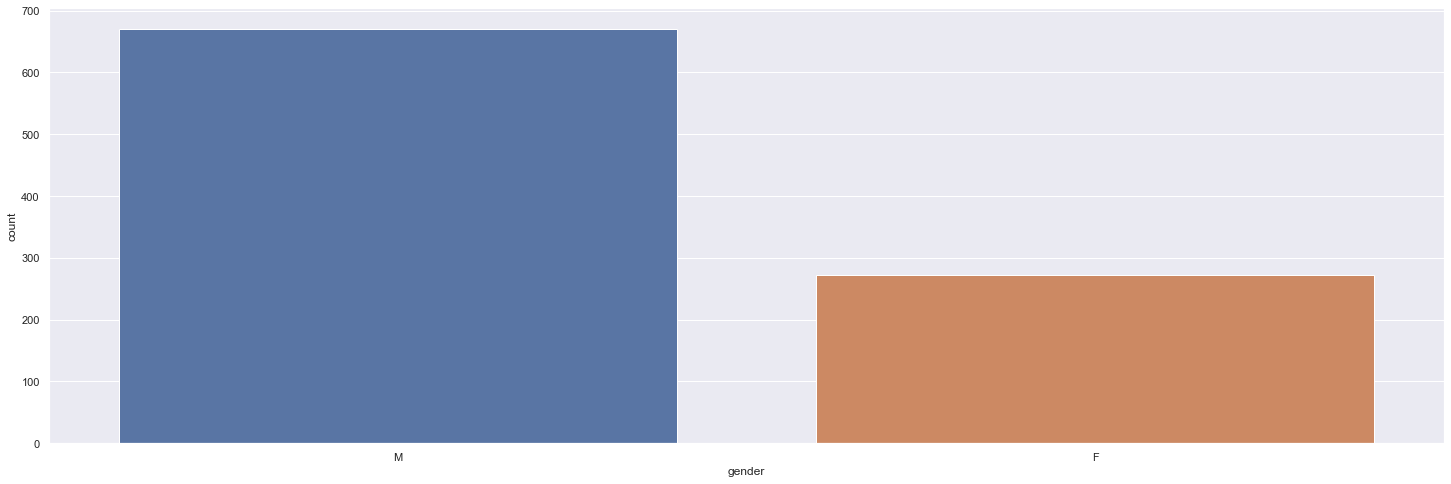

In [25]:
plt.figure(figsize=(25,8))
sns.countplot(user['gender'])

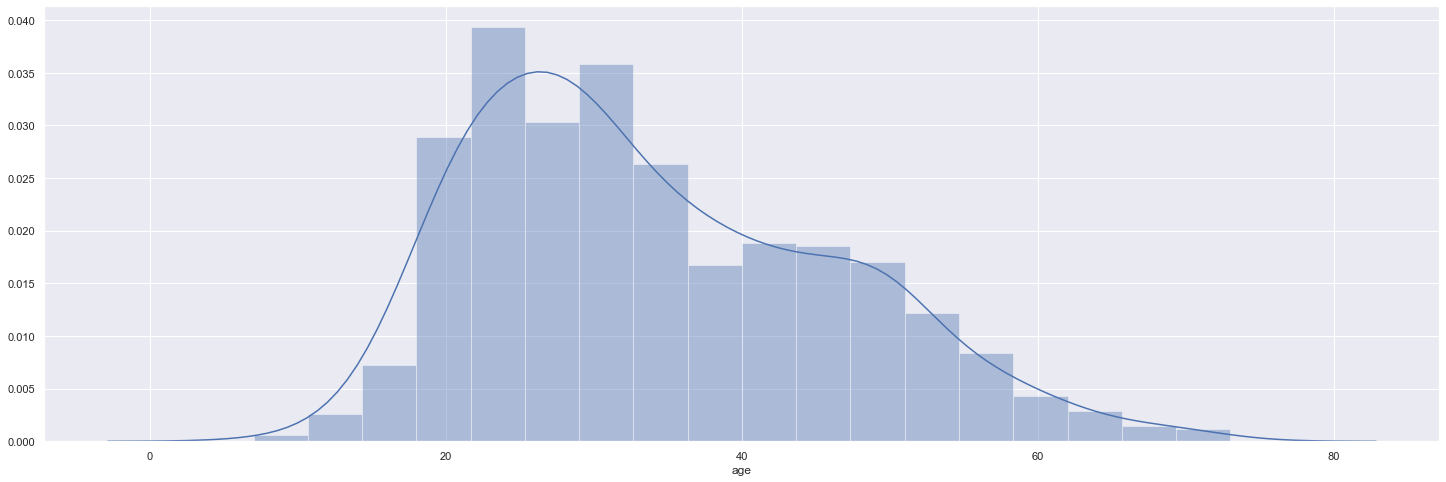

In [26]:
plt.figure(figsize=(25,8))
sns.distplot(user.age)

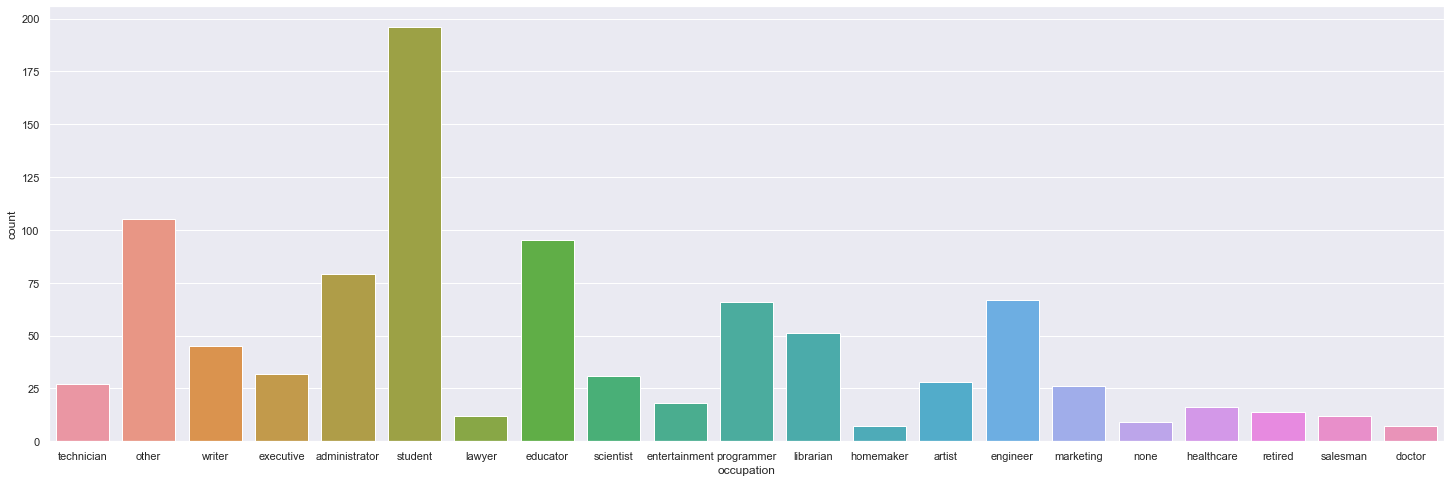

In [243]:
plt.figure(figsize=(25,8))
sns.countplot(user['occupation'])

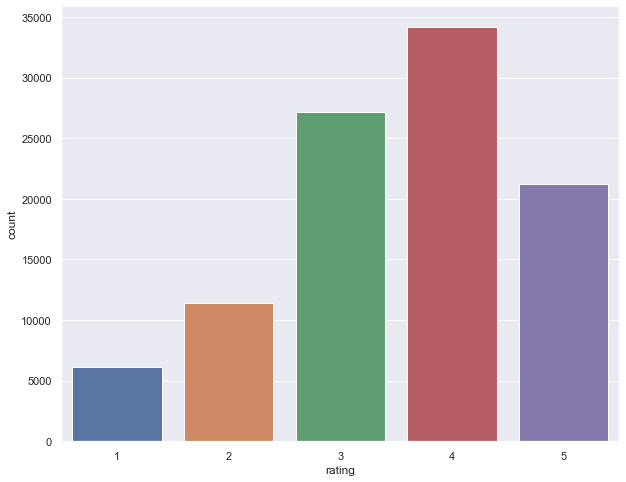

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(data['rating'])

Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [288]:
item.columns

Index(['movie title', 'release date', 'unknown', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'year'],
      dtype='object')

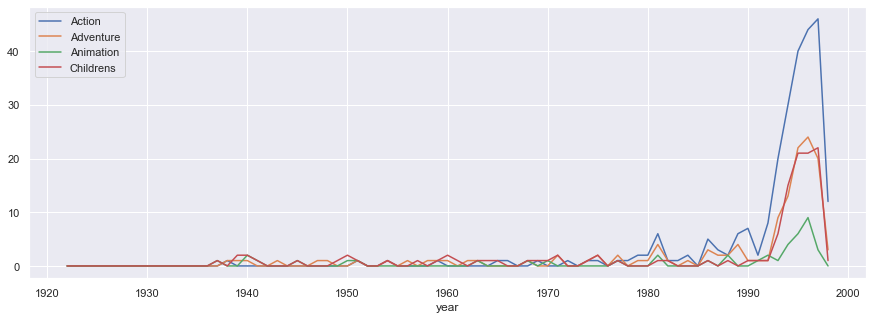

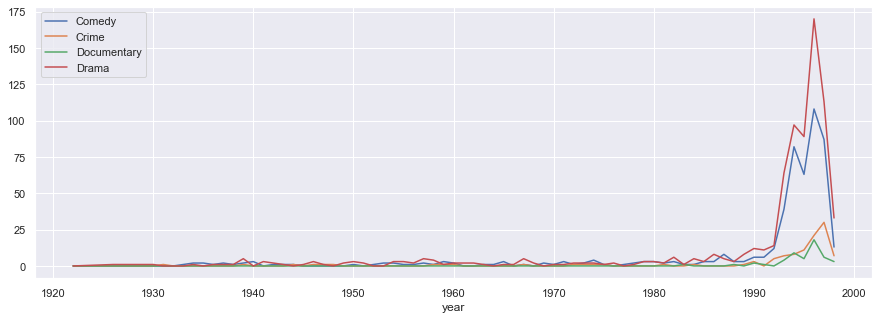

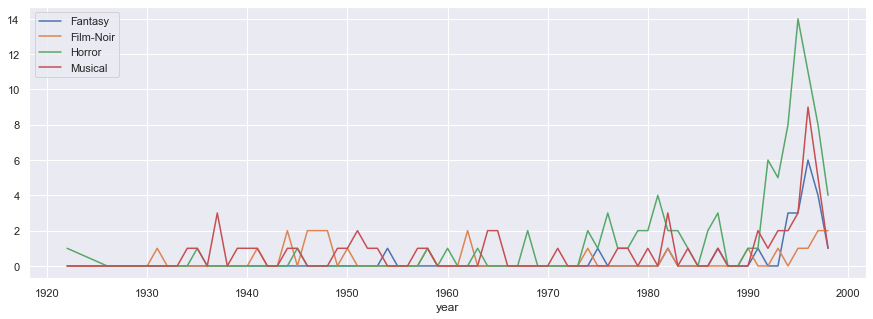

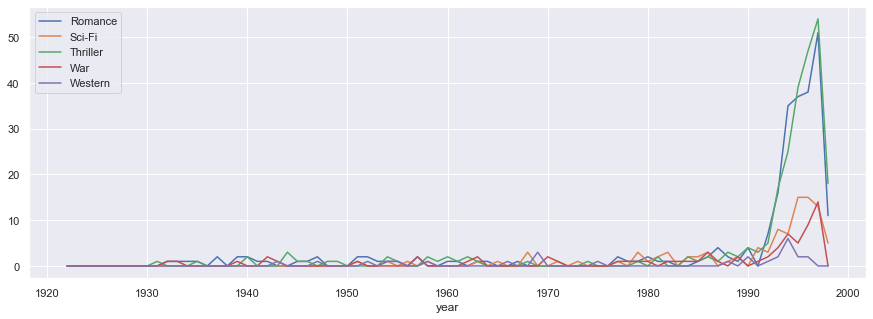

In [29]:
item['year'] = pd.DatetimeIndex(item['release date']).year
# setting first name as index column 
#item.set_index("year", inplace = True) 

#item.groupby(by=['year'])
item[['year','Action','Adventure','Animation', 'Childrens']].groupby(['year']).sum().plot(figsize=(15,5))
item[['year','Comedy', 'Crime', 'Documentary', 'Drama']].groupby(['year']).sum().plot(figsize=(15,5))
item[['year','Fantasy', 'Film-Noir', 'Horror', 'Musical']].groupby(['year']).sum().plot(figsize=(15,5))
item[['year','Romance','Sci-Fi', 'Thriller', 'War', 'Western']].groupby(['year']).sum().plot(figsize=(15,5))
#plt.show()
#print(item.groupby)
#sum_column1 = item.sum(axis=0, numeric_only=True)
#print(sum_column1)
#plt.show()
#item.head() 

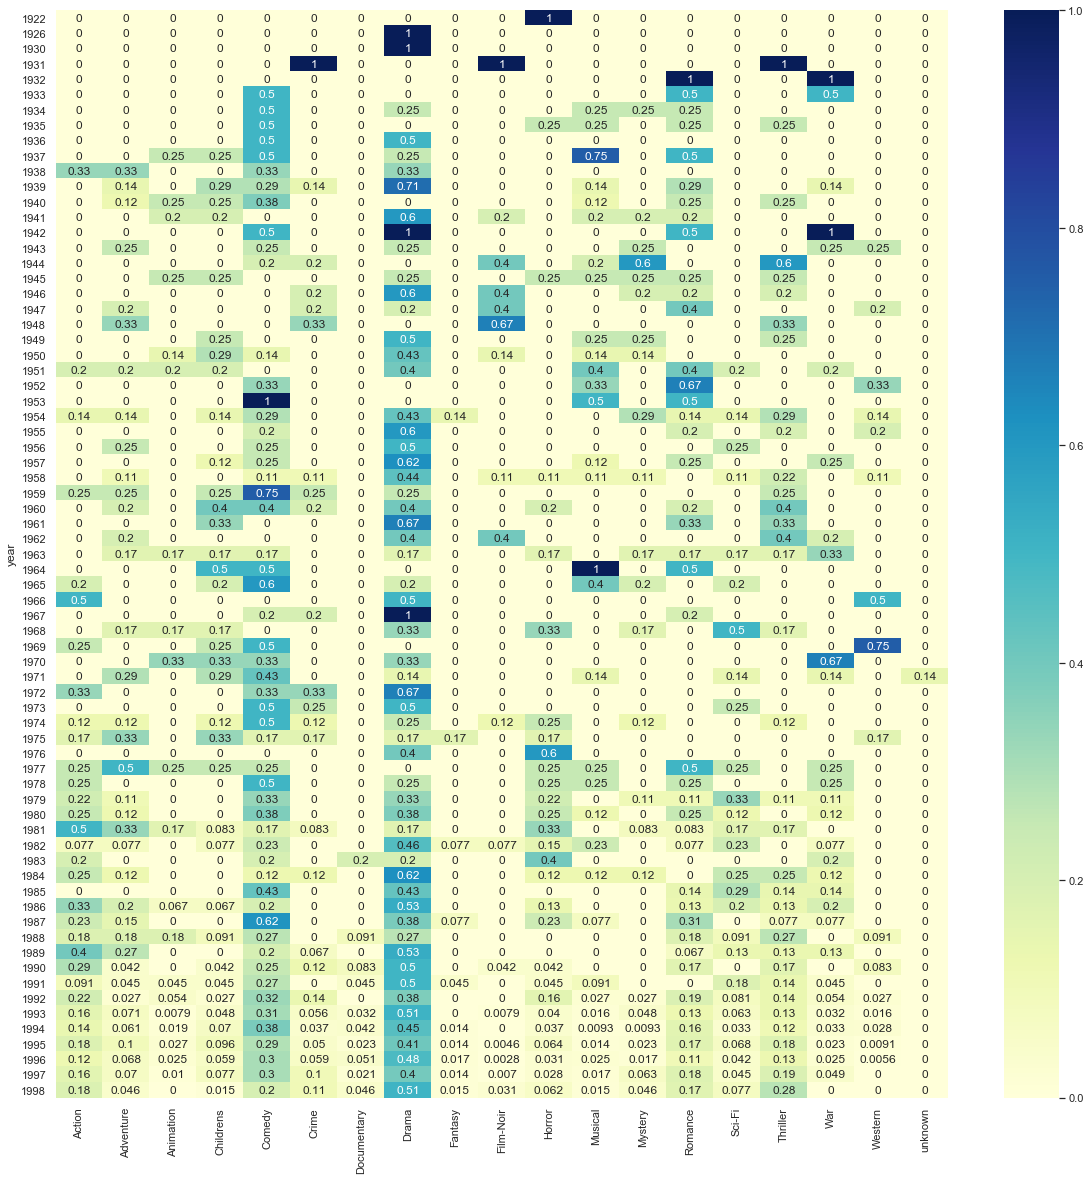

In [292]:
heatmap1_data = pd.pivot_table(item, index=['year'])
plt.figure(figsize=(20,20))
sns.heatmap(heatmap1_data, annot=True, cmap="YlGnBu")

THe  top 25 movies according to average ratings such that each movie has number of ratings more than 100 -

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [358]:
#First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
Movie_data=pd.merge(item,data,how='inner', on='movie id')
Top_rated_movies = Movie_data.groupby('movie title').size().sort_values(ascending=False)[:338]
Top_rated_movies
#We're splitting the DataFrame into groups by movie title and applying the size method to get the count of records in each group.
#Then we order our results in descending order and limit the output to the Moovies having more than 100 views/ratings


movie title
Star Wars                           583
Contact                             509
Fargo                               508
Return of the Jedi                  507
Liar Liar                           485
                                   ... 
Basic Instinct                      101
I Know What You Did Last Summer     100
Private Parts                       100
Alien 3                             100
Muriel's Wedding                    100
Length: 338, dtype: int64

In [343]:
# We can use the agg method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions.
Movie_data=pd.merge(item,data,how='inner', on='movie id')
movie_stats = Movie_data.groupby('movie title').agg({'rating': [np.size, np.mean]})
more_than_100 = movie_stats['rating']['size'] >= 100
movie_stats[more_than_100].sort_values([('rating', 'mean')], ascending=False)[:50]
#movie_stats.head(100)
#Movie_data.sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                     size      mean
movie title                                                        
Close Shave, A                                        112  4.491071
Schindler's List                                      298  4.466443
Wrong Trousers, The                                   118  4.466102
Casablanca                                            243  4.456790
Shawshank Redemption, The                             283  4.445230
Rear Window                                           209  4.387560
Usual Suspects, The                                   267  4.385768
Star Wars                                             583  4.358491
12 Angry Men                                          125  4.344000
Citizen Kane                                          198  4.292929
To Kill a Mockingbird                                 219  4.292237
One Flew Over the Cuckoo's Nest                       264  4.291667
Silence of the Lambs, The                             390  4.289744
North by Northwest                                    179  4.284916
Godfather, The                                        413  4.283293
Secrets & Lies                                        162  4.265432
Good Will Hunting                                     198  4.262626
Manchurian Candidate, The                             131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark                               420  4.252381
Vertigo                                               179  4.251397
Titanic                                               350  4.245714
Lawrence of Arabia                                    173  4.231214
Maltese Falcon, The                                   138  4.210145
Empire Strikes Back, The                              367  4.204360
Boot, Das                                             201  4.203980
Sling Blade                                           136  4.198529
As Good As It Gets                                    112  4.196429
Godfather: Part II, The                               209  4.186603
African Queen, The                                    152  4.184211
Bridge on the River Kwai, The                         165  4.175758
Cinema Paradiso                                       121  4.173554
Princess Bride, The                                   324  4.172840
Amadeus                                               276  4.163043
L.A. Confidential                                     297  4.161616
Fargo                                                 508  4.155512
Braveheart                                            297  4.151515
Blade Runner                                          275  4.138182
Henry V                                               124  4.137097
Chinatown                                             147  4.136054
Killing Fields, The                                   121  4.132231
Mr. Smith Goes to Washington                          105  4.123810
It's a Wonderful Life                                 231  4.121212
Taxi Driver                                           182  4.120879
Raging Bull                                           116  4.120690
Philadelphia Story, The                               104  4.115385
Great Escape, The                                     124  4.104839
Graduate, The                                         239  4.104603
Psycho                                                239  4.100418
Apt Pupil                                             160  4.100000

 See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [405]:
gender_group = Movie_total.groupby('gender').size()
gender_group

gender
F    25738
M    74253
dtype: int64

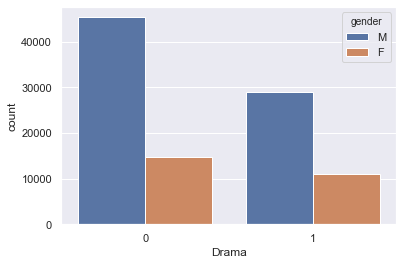

In [401]:
Movie_data=pd.merge(item,data,how='inner', on='movie id')
Movie_total=pd.merge(Movie_data,user,how='inner', on='user id')
Movie_total
sns.countplot(Movie_total['Drama'], hue=Movie_total['gender'])

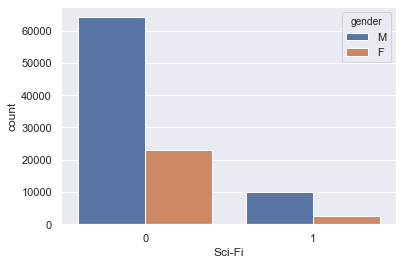

In [35]:
Movie_data=pd.merge(item,data,how='inner', on='movie id')
Movie_total=pd.merge(Movie_data,user,how='inner', on='user id')
Movie_total
sns.countplot(Movie_total['Sci-Fi'], hue=Movie_total['gender'])


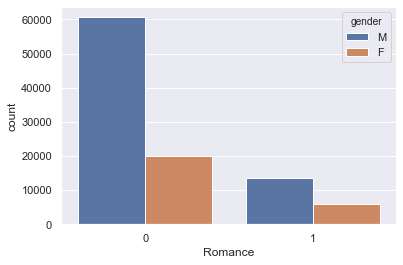

In [34]:
Movie_data=pd.merge(item,data,how='inner', on='movie id')
Movie_total=pd.merge(Movie_data,user,how='inner', on='user id')
Movie_total
sns.countplot(Movie_total['Romance'], hue=Movie_total['gender'])


In order to investigate the three hypothesis of this section, these are: 
Men watch more drama than women
Women watch more Sci-Fi than men
Men watch more Romance than women

I choose to define the percentage of viewing rate according to genders for certain movie genres (Drama, Sci-Fi and Romance), by merging the three datasets into one and visualize the respective data via countplots.

From the figures and visualisations we can conclude to the below:
Men watch more drama than women: is false  as females view and rate Dramas 42,73% while Male 37,7%
Women watch more Sci-Fi than men: is false as females view and rate Sci-Fi movies 7,7% while Male 13,46%
Men watch more Romance than women: is false as females view and rate Romance 23,31% while Male 16,16%

        Total	Drama	Sci-Fi	Romance
Female	25738	11000	2000	6000
Male 	74253	28000	10000	12000
		Percentage		
		42,73%	7,77%	23,31%
		37,70%	13,46%	16,16%
